# Exploratory Flight data analysis 


## Introduction & About the dataset:

I Downloded the dataset from the Statistical Computing
Statistical Graphics website. I gathered all of the data for the year of 2018. The website wouldn't allow me to downlod it once, so I downloded each month separatlly. Then I will concat all the data in one master dataframe. The dataset has around 7M observations.

In this project I will preform some data wrangling and data analysis alongside with some insights about the dataset.

## Data Wrangling 

### Gathering

In [91]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


# letting the matplotlib plot all the data points.
plt.rcParams['agg.path.chunksize'] = 10000

# make pandas show all the columns. 
pd.set_option('display.max_columns', None)


In [92]:
# reading all the files for each month of the year 2018. 

df_m1 = pd.read_csv('flight_m1.csv')
df_m2 = pd.read_csv('flight_m2.csv')
df_m3 = pd.read_csv('flight_m3.csv')
df_m4 = pd.read_csv('flight_m4.csv')
df_m5 = pd.read_csv('flight_m5.csv')
df_m6 = pd.read_csv('flight_m6.csv')
df_m7 = pd.read_csv('flight_m7.csv')
df_m8 = pd.read_csv('flight_m8.csv')
df_m9 = pd.read_csv('flight_m9.csv')
df_m10 = pd.read_csv('flight_m10.csv')
df_m11 = pd.read_csv('flight_m11.csv')
df_m12 = pd.read_csv('flight_m12.csv')



df_m1.head()

C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 39
0,2018,1,14,7,2018-01-14,9E,3468,15096,1509602,35096,SYR,"Syracuse, NY",New York,11433,1143302,31295,DTW,"Detroit, MI",Michigan,535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,B,0.0,NaN,1.0,374.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,1,3,3,2018-01-03,9E,3468,15096,1509602,35096,SYR,"Syracuse, NY",New York,12953,1295304,31703,LGA,"New York, NY",New York,1358,1348.0,-10.0,0.0,0.0,1506.0,-13.0,0.0,0.0,0.0,NaN,0.0,42.0,1.0,198.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,1,6,6,2018-01-06,9E,3468,15096,1509602,35096,SYR,"Syracuse, NY",New York,12953,1295304,31703,LGA,"New York, NY",New York,1358,1410.0,12.0,12.0,0.0,1543.0,24.0,24.0,1.0,0.0,NaN,0.0,45.0,1.0,198.0,12.0,0.0,12.0,0.0,0.0,NaN
3,2018,1,7,7,2018-01-07,9E,3468,15096,1509602,35096,SYR,"Syracuse, NY",New York,12953,1295304,31703,LGA,"New York, NY",New York,1358,1347.0,-11.0,0.0,0.0,1455.0,-24.0,0.0,0.0,0.0,NaN,0.0,38.0,1.0,198.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,1,8,1,2018-01-08,9E,3468,15096,1509602,35096,SYR,"Syracuse, NY",New York,12953,1295304,31703,LGA,"New York, NY",New York,1358,1350.0,-8.0,0.0,0.0,1509.0,-10.0,0.0,0.0,0.0,NaN,0.0,39.0,1.0,198.0,NaN,NaN,NaN,NaN,NaN,NaN


### Assessing

In [93]:
df_m12.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 39
0,2018,12,27,4,2018-12-27,DL,867,15096,1509602,35096,SYR,"Syracuse, NY",New York,10397,1039707,30397,ATL,"Atlanta, GA",Georgia,1747,1746.0,-1.0,0.0,0.0,2022.0,-8.0,0.0,0.0,0.0,NaN,0.0,132.0,1.0,794.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,12,27,4,2018-12-27,DL,868,10397,1039707,30397,ATL,"Atlanta, GA",Georgia,11697,1169706,32467,FLL,"Fort Lauderdale, FL",Florida,1200,1200.0,0.0,0.0,0.0,1408.0,12.0,12.0,0.0,0.0,NaN,0.0,87.0,1.0,581.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,12,27,4,2018-12-27,DL,868,11697,1169706,32467,FLL,"Fort Lauderdale, FL",Florida,10397,1039707,30397,ATL,"Atlanta, GA",Georgia,1440,1456.0,16.0,16.0,1.0,1658.0,19.0,19.0,1.0,0.0,NaN,0.0,90.0,1.0,581.0,0.0,0.0,7.0,0.0,12.0,NaN
3,2018,12,27,4,2018-12-27,DL,869,14679,1467903,33570,SAN,"San Diego, CA",California,14747,1474703,30559,SEA,"Seattle, WA",Washington,1851,1846.0,-5.0,0.0,0.0,2205.0,11.0,11.0,0.0,0.0,NaN,0.0,175.0,1.0,1050.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,12,27,4,2018-12-27,DL,869,14747,1474703,30559,SEA,"Seattle, WA",Washington,14679,1467903,33570,SAN,"San Diego, CA",California,1519,1519.0,0.0,0.0,0.0,1728.0,-38.0,0.0,0.0,0.0,NaN,0.0,113.0,1.0,1050.0,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
len(df_m1.columns)

40

In [95]:
df_m1.shape

(570118, 40)

In [96]:
df_m12.shape

(593842, 40)

In [97]:
df = pd.concat([df_m1,df_m2,df_m3,df_m4,df_m5,df_m6,df_m7,df_m8,df_m9,df_m10,df_m11,df_m12])

In [98]:
df.sample(3)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 39
523777,2018,4,13,5,2018-04-13,WN,4846,15016,1501606,31123,STL,"St. Louis, MO",Missouri,13232,1323202,30977,MDW,"Chicago, IL",Illinois,1735,1734.0,-1.0,0.0,0.0,1821.0,-14.0,0.0,0.0,0.0,NaN,0.0,35.0,1.0,251.0,NaN,NaN,NaN,NaN,NaN,NaN
177861,2018,3,26,1,2018-03-26,MQ,3785,12992,1299206,32600,LIT,"Little Rock, AR",Arkansas,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",Texas,1550,1543.0,-7.0,0.0,0.0,1650.0,-23.0,0.0,0.0,0.0,NaN,0.0,52.0,1.0,304.0,NaN,NaN,NaN,NaN,NaN,NaN
278744,2018,12,6,4,2018-12-06,AA,2754,13930,1393007,30977,ORD,"Chicago, IL",Illinois,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",Texas,1311,1321.0,10.0,10.0,0.0,1554.0,14.0,14.0,0.0,0.0,NaN,0.0,126.0,1.0,801.0,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df.shape

(7213446, 40)

In [100]:
df.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'ARR_DEL15', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'AIR_TIME',
       'FLIGHTS', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 39'],
      dtype='object')

In [101]:
df.OP_UNIQUE_CARRIER.nunique()

18

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213446 entries, 0 to 593841
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   MONTH                  int64  
 2   DAY_OF_MONTH           int64  
 3   DAY_OF_WEEK            int64  
 4   FL_DATE                object 
 5   OP_UNIQUE_CARRIER      object 
 6   OP_CARRIER_FL_NUM      int64  
 7   ORIGIN_AIRPORT_ID      int64  
 8   ORIGIN_AIRPORT_SEQ_ID  int64  
 9   ORIGIN_CITY_MARKET_ID  int64  
 10  ORIGIN                 object 
 11  ORIGIN_CITY_NAME       object 
 12  ORIGIN_STATE_NM        object 
 13  DEST_AIRPORT_ID        int64  
 14  DEST_AIRPORT_SEQ_ID    int64  
 15  DEST_CITY_MARKET_ID    int64  
 16  DEST                   object 
 17  DEST_CITY_NAME         object 
 18  DEST_STATE_NM          object 
 19  CRS_DEP_TIME           int64  
 20  DEP_TIME               float64
 21  DEP_DELAY              float64
 22  DEP_DELAY_NEW      

In [103]:
df.SECURITY_DELAY.nunique()

214

In [104]:
df.WEATHER_DELAY.nunique()

1037

In [105]:
sum(df.duplicated())

0

In [106]:
sum(df.OP_UNIQUE_CARRIER.isnull())

0

In [107]:
df.isnull().values.any()

True

In [108]:
df.isnull().sum()

YEAR                           0
MONTH                          0
DAY_OF_MONTH                   0
DAY_OF_WEEK                    0
FL_DATE                        0
OP_UNIQUE_CARRIER              0
OP_CARRIER_FL_NUM              0
ORIGIN_AIRPORT_ID              0
ORIGIN_AIRPORT_SEQ_ID          0
ORIGIN_CITY_MARKET_ID          0
ORIGIN                         0
ORIGIN_CITY_NAME               0
ORIGIN_STATE_NM                0
DEST_AIRPORT_ID                0
DEST_AIRPORT_SEQ_ID            0
DEST_CITY_MARKET_ID            0
DEST                           0
DEST_CITY_NAME                 0
DEST_STATE_NM                  0
CRS_DEP_TIME                   0
DEP_TIME                  112317
DEP_DELAY                 117234
DEP_DELAY_NEW             117234
DEP_DEL15                 117234
ARR_TIME                  119245
ARR_DELAY                 137040
ARR_DELAY_NEW             137040
ARR_DEL15                 137040
CANCELLED                      0
CANCELLATION_CODE        7096862
DIVERTED  

In [109]:
df.FLIGHTS.unique()

array([1.])

In [110]:
df.DAY_OF_WEEK.unique()

array([7, 3, 6, 1, 2, 4, 5], dtype=int64)

### Quality:

- Change datatypes for multipe columns. 
- Missing values on some of the columns. 

### Tidiness:
- The data has multiple files; it should be gathered as one dataframe. 
- Drop unnecessary columns. 
- Since CARRIER_DELAY , WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY has more than 80% missing data, we should remove them. 


## Cleaning

In [111]:
df.sample(1)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 39
184522,2018,12,16,7,2018-12-16,AA,1080,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",Texas,13930,1393007,30977,ORD,"Chicago, IL",Illinois,1240,1240.0,0.0,0.0,0.0,1452.0,-10.0,0.0,0.0,0.0,NaN,0.0,110.0,1.0,801.0,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213446 entries, 0 to 593841
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   MONTH                  int64  
 2   DAY_OF_MONTH           int64  
 3   DAY_OF_WEEK            int64  
 4   FL_DATE                object 
 5   OP_UNIQUE_CARRIER      object 
 6   OP_CARRIER_FL_NUM      int64  
 7   ORIGIN_AIRPORT_ID      int64  
 8   ORIGIN_AIRPORT_SEQ_ID  int64  
 9   ORIGIN_CITY_MARKET_ID  int64  
 10  ORIGIN                 object 
 11  ORIGIN_CITY_NAME       object 
 12  ORIGIN_STATE_NM        object 
 13  DEST_AIRPORT_ID        int64  
 14  DEST_AIRPORT_SEQ_ID    int64  
 15  DEST_CITY_MARKET_ID    int64  
 16  DEST                   object 
 17  DEST_CITY_NAME         object 
 18  DEST_STATE_NM          object 
 19  CRS_DEP_TIME           int64  
 20  DEP_TIME               float64
 21  DEP_DELAY              float64
 22  DEP_DELAY_NEW      

In [113]:
# Droping unwanted columns

df.drop(['ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_ID',
        'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'CANCELLATION_CODE', 'CARRIER_DELAY',
        'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 39',
        'FL_DATE','OP_CARRIER_FL_NUM', 'FLIGHTS', 'YEAR', 'ORIGIN_CITY_NAME',
        'DEST_CITY_NAME','CRS_DEP_TIME','DEP_DELAY_NEW','ARR_DELAY_NEW'], axis=1, inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213446 entries, 0 to 593841
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   MONTH              int64  
 1   DAY_OF_MONTH       int64  
 2   DAY_OF_WEEK        int64  
 3   OP_UNIQUE_CARRIER  object 
 4   ORIGIN             object 
 5   ORIGIN_STATE_NM    object 
 6   DEST               object 
 7   DEST_STATE_NM      object 
 8   DEP_TIME           float64
 9   DEP_DELAY          float64
 10  DEP_DEL15          float64
 11  ARR_TIME           float64
 12  ARR_DELAY          float64
 13  ARR_DEL15          float64
 14  CANCELLED          float64
 15  DIVERTED           float64
 16  AIR_TIME           float64
 17  DISTANCE           float64
dtypes: float64(10), int64(3), object(5)
memory usage: 1.0+ GB


In [115]:
df.sample(2)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_NM,DEST,DEST_STATE_NM,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,DISTANCE
549844,9,19,3,WN,BNA,Tennessee,MDW,Illinois,2138.0,-7.0,0.0,2257.0,-3.0,0.0,0.0,0.0,63.0,395.0
464336,3,14,3,9E,ATL,Georgia,IAH,Texas,726.0,-3.0,0.0,842.0,-3.0,0.0,0.0,0.0,112.0,689.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213446 entries, 0 to 593841
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   MONTH              int64  
 1   DAY_OF_MONTH       int64  
 2   DAY_OF_WEEK        int64  
 3   OP_UNIQUE_CARRIER  object 
 4   ORIGIN             object 
 5   ORIGIN_STATE_NM    object 
 6   DEST               object 
 7   DEST_STATE_NM      object 
 8   DEP_TIME           float64
 9   DEP_DELAY          float64
 10  DEP_DEL15          float64
 11  ARR_TIME           float64
 12  ARR_DELAY          float64
 13  ARR_DEL15          float64
 14  CANCELLED          float64
 15  DIVERTED           float64
 16  AIR_TIME           float64
 17  DISTANCE           float64
dtypes: float64(10), int64(3), object(5)
memory usage: 1.0+ GB


In [117]:
df.isnull().sum()

MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
OP_UNIQUE_CARRIER         0
ORIGIN                    0
ORIGIN_STATE_NM           0
DEST                      0
DEST_STATE_NM             0
DEP_TIME             112317
DEP_DELAY            117234
DEP_DEL15            117234
ARR_TIME             119245
ARR_DELAY            137040
ARR_DEL15            137040
CANCELLED                 0
DIVERTED                  0
AIR_TIME             134442
DISTANCE                  0
dtype: int64

In [118]:
# Droping NA values. 

df = df.dropna()

In [119]:
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
ORIGIN               0
ORIGIN_STATE_NM      0
DEST                 0
DEST_STATE_NM        0
DEP_TIME             0
DEP_DELAY            0
DEP_DEL15            0
ARR_TIME             0
ARR_DELAY            0
ARR_DEL15            0
CANCELLED            0
DIVERTED             0
AIR_TIME             0
DISTANCE             0
dtype: int64

In [120]:
df.shape

(7071817, 18)

In [122]:
# Covert datatype for some of the columns. 

df['OP_UNIQUE_CARRIER'] = df.OP_UNIQUE_CARRIER.astype('category')
df['ORIGIN'] = df.ORIGIN.astype('category')
df['DEST'] = df.DEST.astype('category')
df['ORIGIN_STATE_NM'] = df.ORIGIN_STATE_NM.astype('category')
df['DEST_STATE_NM'] = df.DEST_STATE_NM.astype('category')
df['DEP_DEL15'] = df.DEP_DEL15.astype('category')
df['ARR_DEL15'] = df.ARR_DEL15.astype('category')
df['CANCELLED'] = df.CANCELLED.astype('category')
df['DIVERTED'] = df.DIVERTED.astype('category')


In [123]:
# converting months and day of the week to a readable format.
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].replace([1,2,3,4,5,6,7],
                                              ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

df['DAY_OF_WEEK'].unique()

array(['Wednesday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Thursday',
       'Friday'], dtype=object)

In [124]:
months_str = ['Jan', 'Feb' , 'Mar' , 'Apr' , 'May' ,
              'Jun', 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' ,
              'Dec']

df['MONTH'] = df['MONTH'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                                 months_str)

df['MONTH'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [125]:
df['MONTH'] = df.MONTH.astype('category')
df['DAY_OF_WEEK'] = df.DAY_OF_WEEK.astype('category')

In [189]:
df.rename(columns={'OP_UNIQUE_CARRIER': 'CARRIER'},inplace=True)

### Storage

In [190]:
df.to_csv('master_flights.csv')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7071817 entries, 1 to 593841
Data columns (total 18 columns):
 #   Column           Dtype   
---  ------           -----   
 0   MONTH            category
 1   DAY_OF_MONTH     int64   
 2   DAY_OF_WEEK      category
 3   CARRIER          category
 4   ORIGIN           category
 5   ORIGIN_STATE_NM  category
 6   DEST             category
 7   DEST_STATE_NM    category
 8   DEP_TIME         float64 
 9   DEP_DELAY        float64 
 10  DEP_DEL15        category
 11  ARR_TIME         float64 
 12  ARR_DELAY        float64 
 13  ARR_DEL15        category
 14  CANCELLED        category
 15  DIVERTED         category
 16  AIR_TIME         float64 
 17  DISTANCE         float64 
dtypes: category(11), float64(6), int64(1)
memory usage: 519.3 MB


## Insights and visulizations

### Tthe intreseting features of the dataset are:
- CARRIER
- MONTH
- DAY_OF_WEEK
- DEP_DELAY
- ARR_DELAY
- ARR_DEL15


### Univariate Exploration of Data. 

### The Distribution of flight based on carrier. 

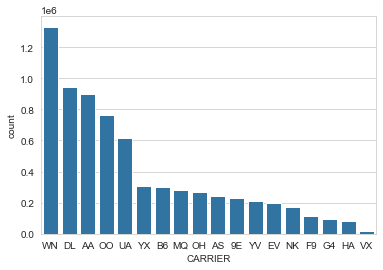

In [154]:
base_color = sb.color_palette()[0]
months_order = df['CARRIER'].value_counts().index

sb.countplot(data=df, x='CARRIER', color = base_color,
            order=months_order);

#### Southwest Airline(WN) has the most air traffic compared to all of the carriers in the dataset. It has ~1.4 million flight for the year of 2018. Followd by Delta airlines(DL). Virgin Airline is in the bottom of the list, and the reason is becuase it does not fly for many states. 

### The Months Distribution Based on number of flights. 

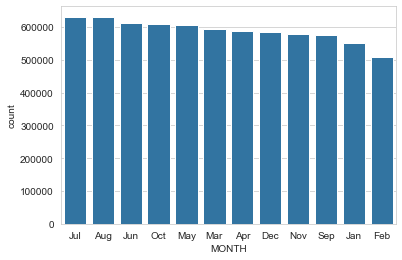

In [155]:
base_color = sb.color_palette()[0]
months_order = df['MONTH'].value_counts().index

sb.countplot(data=df, x='MONTH', color = base_color,
            order=months_order);

#### The busiest month is july followed by Aug and Jun, It makes sense becuase people tend to travel alot in the summer season.  

### Days Distribution 

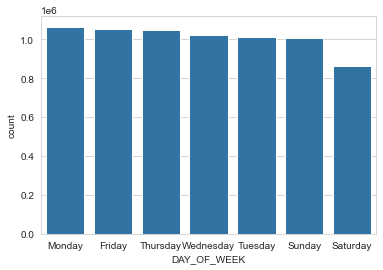

In [188]:
base_color = sb.color_palette()[0]
months_order = df['DAY_OF_WEEK'].value_counts().index

sb.countplot(data=df, x='DAY_OF_WEEK', color = base_color,
            order=months_order);

#### Monday is the busiest day of the week.Since Monday is the start of the week and people tend to travel for business or work. People are less to travel in the weekend, becuase if people are planning to spend the weekend traveling somewhere they probably will travel on Friday which is the next busiest day. 

### Bivariate Exploration of Data

### Is there any corrlation between departure delay and arrival delay? 

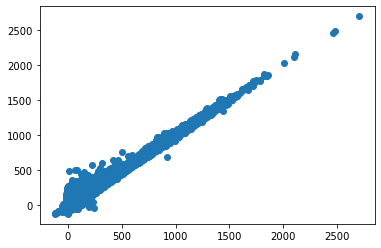

In [130]:
plt.scatter(data=df, x = 'DEP_DELAY', y='ARR_DELAY')

#### There is a strong positive corrleation between departure and arrival delay. It makes sense becuase if the departure delayed the arrival will also get dalyed.

### The monthely Distribution of Departure delay flight.

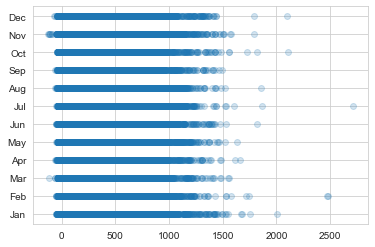

In [157]:
plt.scatter(data=df, x= 'DEP_DELAY', y='MONTH', alpha=1/5);

#### Jan, Dec has the most departure delays. Im assuming becuase of the weather conditions since it's Winter time in the U.S. 

### The Days Distribution of Delayed Flight.

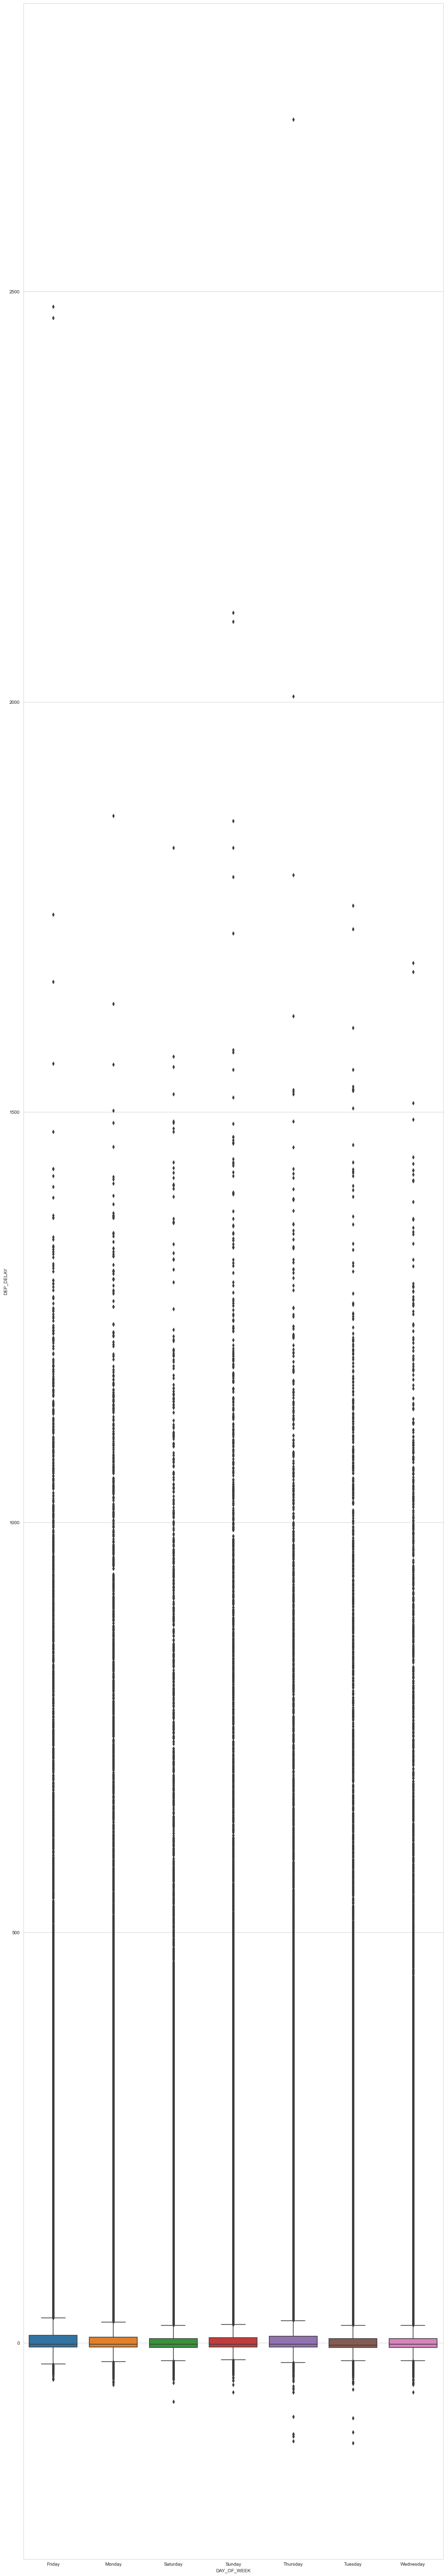

In [158]:
plt.figure(figsize=(16,100))
sb.boxplot(data=df, x = 'DAY_OF_WEEK', y ='DEP_DELAY')


#### Thrusday and Tuesday are best days to travel, Flights on theses two days usually take off on the exact time or even sooner than expected. On the other hand Friday and Monday has the most departure daleys and some times the delay take longer time.

### multivariate Exploration of Data

In [159]:
df.corr()

,DAY_OF_MONTH,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE
DAY_OF_MONTH,1.000000,-0.001029,-0.006322,-0.001919,-0.007984,0.000985,0.001240
DEP_TIME,-0.001029,1.000000,0.139866,0.632954,0.130680,-0.021550,-0.016827
DEP_DELAY,-0.006322,0.139866,1.000000,0.030778,0.957282,0.008942,0.009142
ARR_TIME,-0.001919,0.632954,0.030778,1.000000,0.032352,0.011431,0.006533
ARR_DELAY,-0.007984,0.130680,0.957282,0.032352,1.000000,-0.002190,-0.019505
AIR_TIME,0.000985,-0.021550,0.008942,0.011431,-0.002190,1.000000,0.984719
DISTANCE,0.001240,-0.016827,0.009142,0.006533,-0.019505,0.984719,1.000000


In [177]:
df.sample(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER,ORIGIN,ORIGIN_STATE_NM,DEST,DEST_STATE_NM,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,DISTANCE
308130,Feb,16,Friday,WN,DAL,Texas,ABQ,New Mexico,1555.0,-5.0,0.0,1640.0,-10.0,0.0,0.0,0.0,89.0,580.0
329549,Nov,1,Thursday,HA,HNL,Hawaii,OAK,California,1326.0,1.0,0.0,2147.0,7.0,0.0,0.0,0.0,295.0,2409.0
218570,Sep,24,Monday,MQ,DFW,Texas,SJT,Texas,1633.0,-7.0,0.0,1727.0,-16.0,0.0,0.0,0.0,40.0,229.0
588328,May,19,Saturday,UA,SEA,Washington,IAH,Texas,1224.0,4.0,0.0,1841.0,0.0,0.0,0.0,0.0,229.0,1874.0
529726,Dec,13,Thursday,OH,BHM,Alabama,DCA,Virginia,1004.0,-11.0,0.0,1241.0,-33.0,0.0,0.0,0.0,90.0,653.0
470732,Mar,5,Monday,9E,DTW,Michigan,CWA,Wisconsin,2014.0,-7.0,0.0,2037.0,-12.0,0.0,0.0,0.0,62.0,363.0
211915,Jun,9,Saturday,OO,MSP,Minnesota,DFW,Texas,908.0,18.0,1.0,1158.0,33.0,1.0,0.0,0.0,124.0,852.0
60481,Nov,16,Friday,OO,DEN,Colorado,MOT,North Dakota,2002.0,-4.0,0.0,2249.0,-8.0,0.0,0.0,0.0,89.0,604.0
516454,Oct,24,Wednesday,UA,IAD,Virginia,TPA,Florida,1810.0,15.0,1.0,2007.0,-7.0,0.0,0.0,0.0,104.0,811.0
378438,Apr,21,Saturday,YV,IAH,Texas,BNA,Tennessee,1014.0,-1.0,0.0,1200.0,-13.0,0.0,0.0,0.0,87.0,657.0


### Comparing carriers and if the flight get delayed or not.

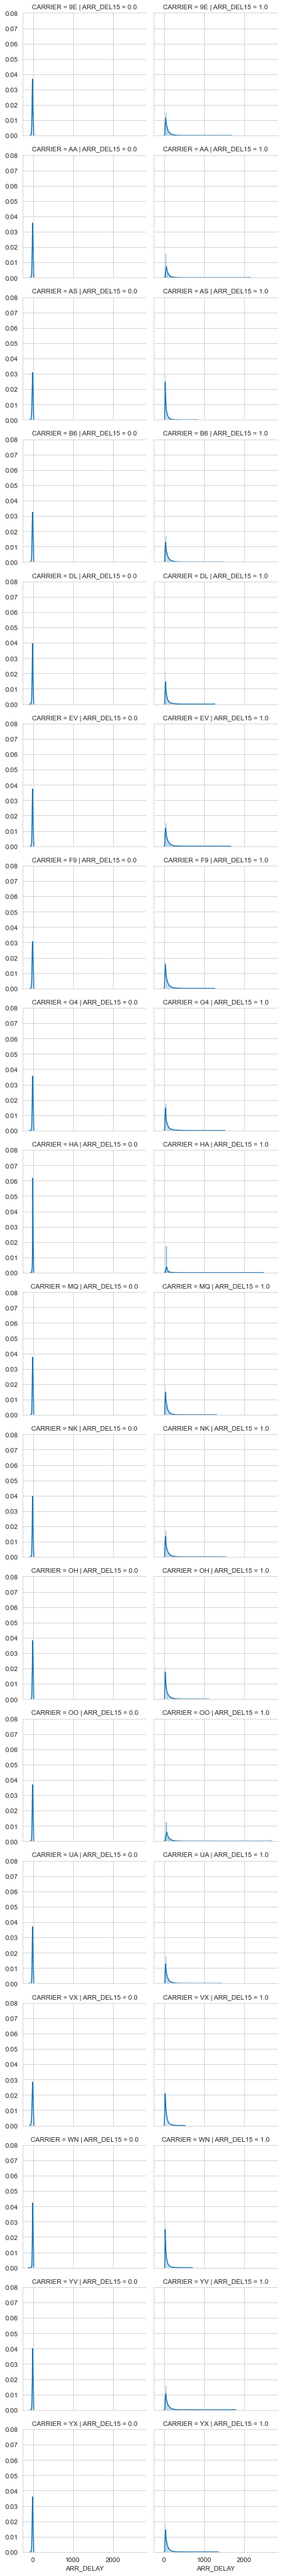

In [162]:
p = sb.FacetGrid(df, col='ARR_DEL15', row='CARRIER')
p = p.map(sb.distplot,'ARR_DELAY')


- Endeavor Air(9E) & Mesa Airlines(YV) & Republic Airways(YX)& United Airlines(UA) & PSA Airlines(OH)& Spirit Airlines(NK) &Envoey Air(MQ) & Allegiant Air(G4) &  Forniter Airlines(F9) &Eva Air(EV) & Delta Airlines(DL): 

- They all shares a normal ration between delayed flight and if  the flight get delayed more than 15 min. 

- American Airlines(AA) and Hawaiian airlines:
- It has a delays flight ratio more than the usual, comparing to the other carriers,but it also has a low ratio on the flights that get delayed for more than 15 mins.

- Alaska Airlines(AS): has the highest ratio for the flights that get delayed for more than 15 mins. 

- Skeywest airlines(OO): it has a normal delay ration on the delay flights, and has low ratio on the flights get delayed for more than 15.min



In [192]:
!jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle

The system cannot find the file specified.
